In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dacon/Auction_master_train.csv")
train=train.loc[train['Auction_key']!=10,]

In [4]:
train

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1567,강제,일반,280000000,삼창감정,2017-02-16 00:00:00,1,0,66419.3,40.55,...,NaN,N,노해로66길,21.0,NaN,2017-08-30 00:00:00,배당,37.648811,127.048683,402500000
1929,1295,임의,일반,200000000,삼상감정,2015-02-21 00:00:00,2,1,20433.8,39.60,...,NaN,N,덕릉로94길,21.0,NaN,2017-05-24 00:00:00,배당,37.663291,127.077063,430234600
1930,254,임의,일반,354805459,서초감정,2016-10-21 00:00:00,2,1,7460.8,19.03,...,NaN,N,소공로,35.0,NaN,2018-03-29 00:00:00,배당,37.558319,126.981994,1118999990
1931,1486,강제,일반,80000000,한미감정,2016-06-17 00:00:00,2,1,16875.8,42.20,...,NaN,N,우이천로,328.0,NaN,2017-01-24 00:00:00,배당,37.647061,127.028002,403000000


In [5]:
len(train['Appraisal_company'].unique())

238

In [6]:
train.corr()['Hammer_price'].sort_values()

Auction_key                   -0.494335
point.x                       -0.357186
Auction_count                 -0.060598
Auction_miscarriage_count     -0.059509
addr_bunji1                   -0.018607
addr_bunji2                    0.000084
road_bunji1                    0.028545
Total_land_gross_area          0.094260
road_bunji2                    0.206681
Claim_price                    0.227550
Current_floor                  0.263951
Total_floor                    0.288378
point.y                        0.357915
Total_land_real_area           0.457389
Total_land_auction_area        0.470488
Total_building_area            0.644298
Total_building_auction_area    0.651966
Total_appraisal_price          0.976729
Minimum_sales_price            0.992170
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64

In [7]:
train['real']=train['Hammer_price']/train['Minimum_sales_price']

In [8]:
train.corr()['real'].sort_values()

Auction_key                   -0.062983
Current_floor                 -0.055709
Total_floor                   -0.051553
Minimum_sales_price           -0.042232
point.x                       -0.039527
road_bunji1                   -0.021469
addr_bunji2                   -0.002634
Total_land_gross_area          0.006978
addr_bunji1                    0.013455
Total_appraisal_price          0.020108
Total_building_area            0.025305
Total_building_auction_area    0.027848
point.y                        0.038295
road_bunji2                    0.047078
Hammer_price                   0.050551
Total_land_real_area           0.059067
Total_land_auction_area        0.060240
Claim_price                    0.104271
Auction_count                  0.356021
Auction_miscarriage_count      0.381825
real                           1.000000
Name: real, dtype: float64

In [9]:
train['addr_dong']

0          우동
1          우동
2         모라동
3         대연동
4         괴정동
        ...  
1928       창동
1929      상계동
1930    회현동1가
1931      쌍문동
1932      가양동
Name: addr_dong, Length: 1932, dtype: object

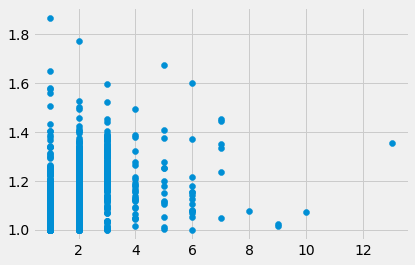

In [10]:
plt.scatter(train['Auction_count'], train['real'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_

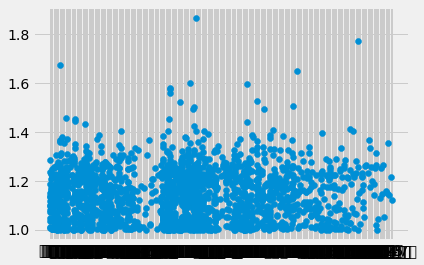

In [11]:
plt.scatter(train['addr_dong'], train['real'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54028 missing from current font.
  font.set_

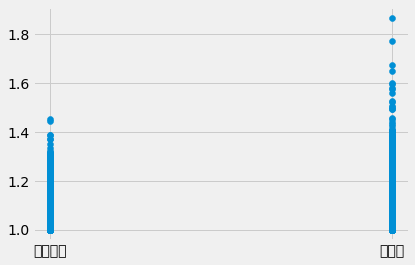

In [12]:

plt.scatter(train['Apartment_usage'], train['real'])

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
enc = []

x_train = train[['addr_dong', 'Apartment_usage', 'Auction_count']]
x_train['addr_dong'] = ordinal_encoder.fit_transform(x_train[['addr_dong']])
enc.append(ordinal_encoder.categories_)
x_train['Apartment_usage'] = ordinal_encoder.fit_transform(x_train[['Apartment_usage']])
enc.append(ordinal_encoder.categories_)

y_train = train['real']

model = RandomForestRegressor()
model.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


RandomForestRegressor()

In [24]:
import numpy as np

with open('test.npy', 'wb') as f:
    np.save(f, enc)
    
# with open('test.npy', 'rb') as f:
#     lt = np.load(f)

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [25]:
# 로드 단

In [26]:
def to_cat(x, arr_cat):
    try:
        ret = np.where(arr_cat[0]==x)[0][0]
    except:
        ret = 0
    return ret

In [27]:
with open('test.npy', 'rb') as f:
    lt = np.load(f, allow_pickle=True)

In [28]:
import pickle
filename = 'model.pickle'
pickle.dump(model, open(filename, 'wb'))

In [29]:
loaded_model = pickle.load(open(filename, 'rb'))

In [30]:
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dacon/Auction_master_test.csv")
sub=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dacon/Auction_submission.csv")

In [31]:
x_test = test[['addr_dong', 'Apartment_usage', 'Auction_count']]
x_test['addr_dong'] = test['addr_dong'].apply(lambda x : to_cat(x, lt[0]))
x_test['Apartment_usage'] = test['Apartment_usage'].apply(lambda x : to_cat(x, lt[1]))
x_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,addr_dong,Apartment_usage,Auction_count
0,33,1,7
1,33,1,6
2,33,1,7
3,33,1,7
4,33,1,7


In [32]:
test['Claim_price']

0      1087000000
1      1087000000
2      1087000000
3      1087000000
4      1087000000
          ...    
824    4249164200
825     320000000
826     160000000
827     230000000
828       6136088
Name: Claim_price, Length: 829, dtype: int64

In [33]:
x_test['real'] = loaded_model.predict(x_test)
x_test['Claim_price'] = test['Claim_price']

x_test['Hammer_price'] = x_test['Claim_price']*x_test['real']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [34]:
sub['Hammer_price'] = x_test['Hammer_price'].apply(lambda x : abs(int(x)))

In [35]:
sub.to_csv('text.csv', index=False)

In [36]:
sub

,Auction_key,Hammer_price
0,1778,1508573019
1,1779,1210310704
2,1784,1508573019
3,1786,1508573019
4,1790,1508573019
...,...,...
824,1762,4786219698
825,1767,364102578
826,1770,184612379
827,1772,243184140
